In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
df=pd.read_csv('Clean_Dataset.csv')
#see top rows of the dataset
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
#drop first coloumn in the dataset
df=df.drop('Unnamed: 0',axis=1)

In [4]:
#show the first rows in dataset
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
#show the last rows in dataset 
df.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [6]:
#see informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [7]:
#statistical describition of the data
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


see the correlation , the correlation is a statistical measure that describes the extent to which two variables change together.

In [8]:
#convert all columns in the DataFrame df to numeric format to see correlation 
#errors='coerce' parameter ensures that if any value cannot be converted to numeric, it will be replaced with NaN 
df_numeric = df.apply(pd.to_numeric, errors='coerce')
correlation_matrix = df_numeric.corr()


In [9]:
correlation_matrix.T

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
airline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.028099,0.024567,-0.029978
source_city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,NaN,-0.028099,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.039157,0.204222
days_left,NaN,0.024567,NaN,NaN,NaN,NaN,NaN,NaN,-0.039157,1.000000,-0.091949


In [10]:
#to see the size of my dataset 
df.shape 

(300153, 11)

In [11]:
#see duplicated values
df.duplicated().sum()

0

In [12]:
#see null values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Analyzing the dataset of flights ('flight' and 'airline' columns)
and counting how many times each combination of flight and airline occurs

In [13]:
f_c=df.groupby(['flight','airline'],as_index=False).count()
f_c.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

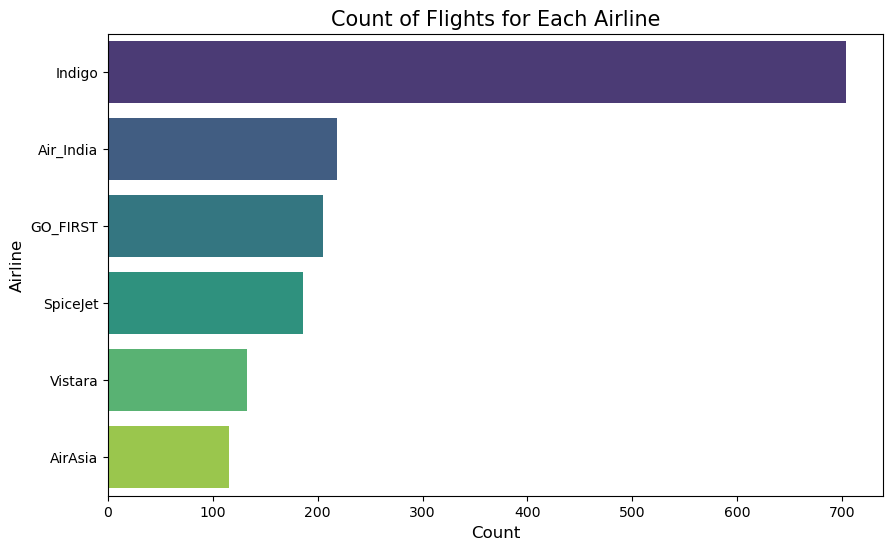

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
airline_counts = f_c['airline'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=airline_counts, y=airline_counts.index, palette='viridis')

plt.title('Count of Flights for Each Airline', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Airline', fontsize=12)

plt.show()

 Analyzing a dataset of flights ('flight' and 'airline'and 'class' columns) and counting how many times each combination of flight and airline and 'class'occurs

In [16]:
f_c2=df.groupby(['flight','airline','class'],as_index=False).count()
f_c2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

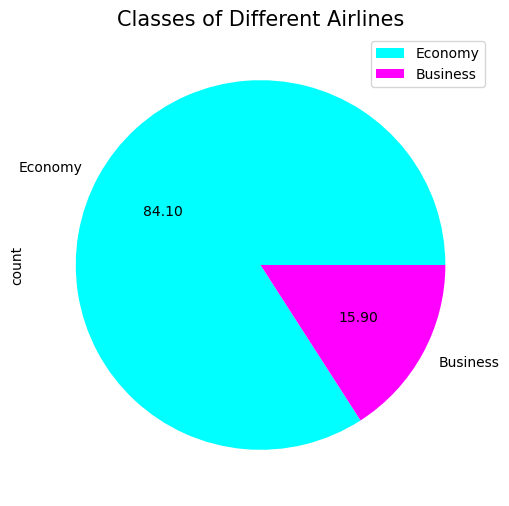

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
f_c2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

Check Outliers

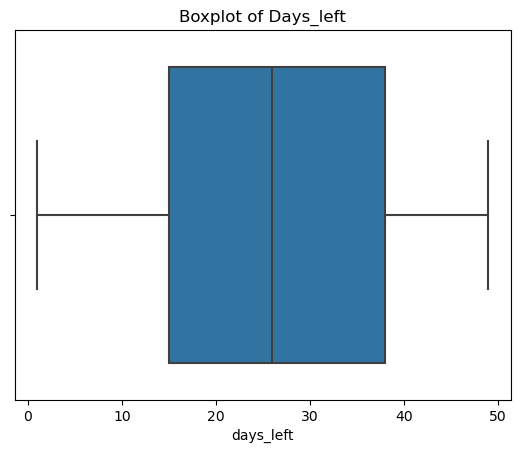

In [22]:
#check days_left outliers
sns.boxplot(x=df['days_left'])
plt.title('Boxplot of Days_left')
plt.show()

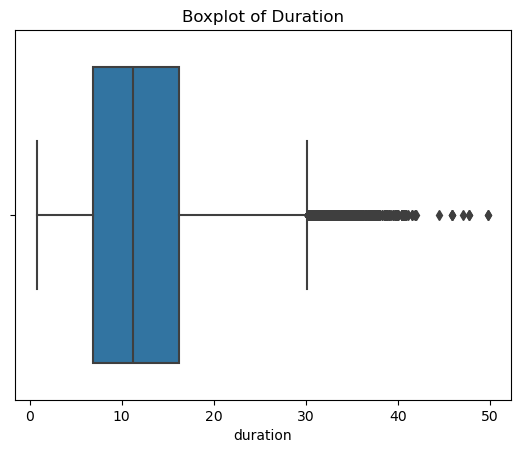

In [23]:
#check duration outliers
sns.boxplot(x=df['duration'])
plt.title('Boxplot of Duration')
plt.show()

Start Handling outliers

In [24]:
#start to handle outliers 
#function to calculate IQR and Q1,Q3 to see if the value is outlier or not
def handle_outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    iqr = Q3 - Q1 
    
    lower = Q1 - iqr *1.5
    upper = Q3 + iqr *1.5
    
    ls = df.index[(df[ft]<lower) | (df[ft]>upper)]
    
    return ls

In [25]:
#remove outliers 
def remove_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [26]:
index_list = handle_outliers(df, 'duration')
df= remove_outliers(df, index_list)

In [27]:
#data after removing outliers
df.shape

(298043, 11)

Show unique values in objects data 

In [28]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [29]:
df['flight'].unique()

array(['SG-8709', 'SG-8157', 'I5-764', ..., '6E-7127', '6E-7259',
       'AI-433'], dtype=object)

In [30]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [31]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [32]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [33]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [34]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [35]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

Convert objects data into numerical data using label encoder 


In [36]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [37]:
#show data after handling object data 
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [38]:
#Split data to x and y
x=df.drop(['price'],axis=1)
y=df['price']

In [39]:
#split 70% into train data , 30% into test data
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((208630, 10), (89413, 10), (208630,), (89413,))

Start data scaling using MinMax scaler

In [40]:
MMscaler=MinMaxScaler(feature_range=(0,1))
X_train=MMscaler.fit_transform(X_train)
X_test=MMscaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)  

Linear Regression


In [41]:
lineareg=LinearRegression()

In [42]:
lineareg.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = lineareg.predict(X_test) 
y_pred

array([ 4796.50855799,  8860.95902586,  5730.94267907, ...,
       50047.04086693, 54095.4571682 ,  8645.74935733])

Make a comparison between actual price and predicted price 

In [44]:
comparison = pd.DataFrame(list(zip(y_test,y_pred)),columns=['Actual','Predicted'])

In [45]:
comparison.head(10)

,Actual,Predicted
0,4170,4796.508558
1,15912,8860.959026
2,4337,5730.942679
3,7572,9726.857127
4,49207,55408.211161
5,7522,6598.438480
6,58282,52506.676712
7,4755,9335.905706
8,8548,2587.253824
9,4390,4057.250744


Evaluate the model 

In [46]:
lineareg.score(X_train,y_train)

0.9047818372733851

In [47]:
lineareg.score(X_test,y_test)

0.9045280699666446

In [48]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, y_pred)

In [49]:
print("Mean Absolute Error:", MAE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RMSE)
print("R^2 Score:", r2)

Mean Absolute Error: 4656.131734857158
Mean Squared Error: 49365338.55771401
Root Mean Squared Error: 7026.047150262657
R^2 Score: 0.9045280699666446


Diagram between actual price and predicted price


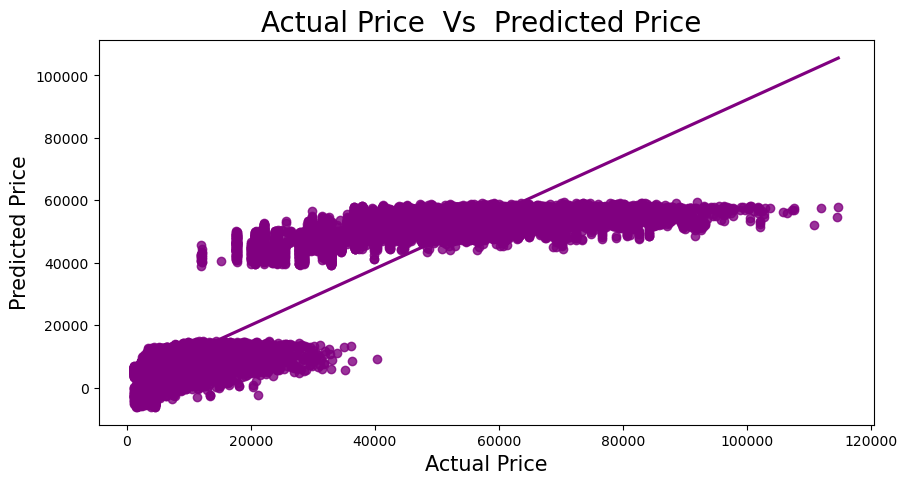

In [50]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,data=df,color='purple')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

KNN Regressor

In [51]:
KNN = KNeighborsRegressor(n_neighbors=5)

In [52]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [53]:
y_pred_1 = KNN.predict(X_test) 
y_pred_1

array([ 3708.,  6488.,  4337., ..., 54481., 48569.,  9837.])

Comparison between actual price and predicted price

In [54]:
comparison_1 = pd.DataFrame(list(zip(y_test,y_pred_1)),columns=['Actual','Predicted'])

In [55]:
comparison_1.head(10)

,Actual,Predicted
0,4170,3708.0
1,15912,6488.0
2,4337,4337.0
3,7572,8568.8
4,49207,50987.8
5,7522,7522.0
6,58282,50943.4
7,4755,4755.0
8,8548,7361.2
9,4390,4390.0


Evaluate the model

In [56]:
KNN.score(X_train,y_train)

0.9833754447848447

In [57]:
KNN.score(X_test,y_test)

0.9738976560523219

In [58]:
MAE_1 = mean_absolute_error(y_test, y_pred_1)
MSE_1 = mean_squared_error(y_test, y_pred_1)
RMSE_1 = np.sqrt(MSE_1)
r2_1 = r2_score(y_test, y_pred_1)

In [59]:
print("Mean Absolute Error:", MAE_1)
print("Mean Squared Error:", MSE_1)
print("Root Mean Squared Error:", RMSE_1)
print("R^2 Score:", r2_1)

Mean Absolute Error: 1780.7148043349403
Mean Squared Error: 13496648.131831389
Root Mean Squared Error: 3673.778454375194
R^2 Score: 0.9738976560523219


Diagram between actual price and predicted price

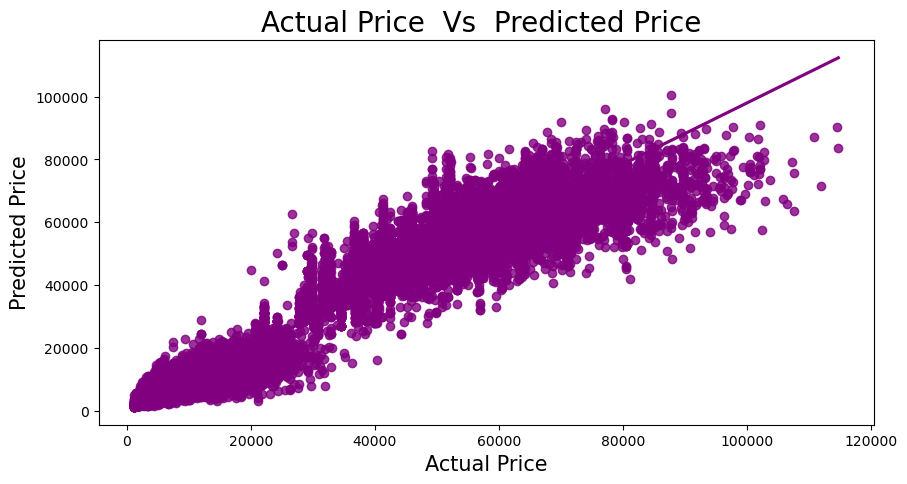

In [60]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred_1,data=df,color='purple')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()